In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity="all"

In [2]:
df=pd.read_csv(r"C:\Users\Devi Vara Prasad\Desktop\Innomatics\Projects\Oyo_dataset_copy1.csv")

In [3]:
df.columns=['Hotel', 'Rating', 'Count', 'Location', 'Actual Price(Rupees)',
       'Discount(% off)', 'Price(Rupees)', 'Amenities', 'Parking', 'Card Payment',
       'AC', 'BreakFast', 'In-house Restaurant', 'Kitchen', 'TV',
       'CCTV Cameras', 'First Aid', 'Power backup', 'Bar',
       'Attached Bathroom','Other']

In [4]:
df

,Hotel,Rating,Count,Location,Actual Price(Rupees),Discount(% off),Price(Rupees),Amenities,Parking,Card Payment,...,BreakFast,In-house Restaurant,Kitchen,TV,CCTV Cameras,First Aid,Power backup,Bar,Attached Bathroom,Other
0,OYO 70321 David Guest House,NaN,NaN,Baga Beach,8295,40,4977,"First Aid , Attached Bathroom , Daily Houseke...",No,No,...,No,No,No,No,No,Yes,No,No,Yes,Yes
1,Collection O 13623 Baga Villa Bomfim,4.4,1055.0,Baga Beach,4022,40,2413,"Parking Facility , In-house Restaurant , TV",Yes,No,...,No,Yes,No,Yes,No,No,No,No,No,Yes
2,Collection O 41384 Coco Heritage Beach Resort,4.2,841.0,Baga Beach,4022,40,2413,"Parking Facility , Attached Bathroom , Daily ...",Yes,No,...,No,No,No,No,No,No,No,No,Yes,Yes
3,Capital O 64180 Adam's Beach Resort,4.8,271.0,Baga Beach,10056,40,6034,"AC , First Aid , TV",No,No,...,No,No,No,Yes,No,Yes,No,No,No,No
4,OYO 7509 O Classio Baga Beach Resort,NaN,NaN,Baga Beach,3816,40,2290,"Parking Facility , First Aid , Attached Bathr...",Yes,No,...,No,No,No,No,No,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,OYO Townhouse 031 Ashvem Beach,4.6,498.0,Arambol,4022,40,2413,"Complimentary Breakfast , AC , TV",No,No,...,Yes,No,No,Yes,No,No,No,No,No,No
376,OYO 14182 Graceful Studio,NaN,NaN,Arambol,4022,40,2413,"Parking Facility , CCTV Cameras , Power backup",Yes,No,...,No,No,No,No,Yes,No,Yes,No,No,No
377,Capital O 49261 Belle Velle Resort Deluxe,4.4,339.0,Arambol,3937,40,2362,"Parking Facility , Attached Bathroom , Daily ...",Yes,No,...,No,No,No,No,No,No,No,No,Yes,Yes
378,OYO 8065 Accovah Map5 Inn,3.6,140.0,Arambol,1753,42,1014,"CCTV Cameras , Geyser , Electric Kettle",No,No,...,No,No,No,No,Yes,No,No,No,No,Yes


# Understanding the data set

In [10]:
df.shape

(380, 21)

In [11]:
df.size

7980

In [12]:
df.ndim

2

In [13]:
type(df)

pandas.core.frame.DataFrame

In [14]:
df.columns

Index(['Hotel', 'Rating', 'Count', 'Location', 'Actual Price(Rupees)',
       'Discount(% off)', 'Price(Rupees)', 'Amenities', 'Parking',
       'Card Payment', 'AC', 'BreakFast', 'In-house Restaurant', 'Kitchen',
       'TV', 'CCTV Cameras', 'First Aid', 'Power backup', 'Bar',
       'Attached Bathroom', 'Other'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 21 columns):
Hotel                   380 non-null object
Rating                  347 non-null float64
Count                   347 non-null float64
Location                380 non-null object
Actual Price(Rupees)    380 non-null int64
Discount(% off)         380 non-null int64
Price(Rupees)           380 non-null int64
Amenities               380 non-null object
Parking                 380 non-null object
Card Payment            380 non-null object
AC                      380 non-null object
BreakFast               380 non-null object
In-house Restaurant     380 non-null object
Kitchen                 380 non-null object
TV                      380 non-null object
CCTV Cameras            380 non-null object
First Aid               380 non-null object
Power backup            380 non-null object
Bar                     380 non-null object
Attached Bathroom       380 non-null object
Other           

- The data set has 21 columns and 380 rows.
- There are 2 columns with missing data.
- Each of the 2 columns has missing data in 33 rows.

# Data Cleaning

In [18]:
round(100*(df.isnull().sum()/len(df.index)),2)

Hotel                   0.00
Rating                  8.68
Count                   8.68
Location                0.00
Actual Price(Rupees)    0.00
Discount(% off)         0.00
Price(Rupees)           0.00
Amenities               0.00
Parking                 0.00
Card Payment            0.00
AC                      0.00
BreakFast               0.00
In-house Restaurant     0.00
Kitchen                 0.00
TV                      0.00
CCTV Cameras            0.00
First Aid               0.00
Power backup            0.00
Bar                     0.00
Attached Bathroom       0.00
Other                   0.00
dtype: float64

- Percentage of missing data in each of the 2 columns is 8.68%
- We have to either impute or replace the rows with missing values

In [20]:
df.loc[:,['Rating','Count']].describe()

,Rating,Count
count,347.000000,347.000000
mean,4.134294,226.337176
std,0.402600,302.238362
min,3.000000,1.000000
25%,3.900000,49.000000
50%,4.200000,112.000000
75%,4.400000,243.000000
max,5.000000,1508.000000


- Mean and median respectively for the columns rating and count are almost same.
- Hence going with the imputation of nan values with median.

In [5]:
df['Rating'].fillna(df['Rating'].median(),inplace=True)

In [6]:
df['Count'].fillna(df['Count'].median(),inplace=True)

In [7]:
df

,Hotel,Rating,Count,Location,Actual Price(Rupees),Discount(% off),Price(Rupees),Amenities,Parking,Card Payment,...,BreakFast,In-house Restaurant,Kitchen,TV,CCTV Cameras,First Aid,Power backup,Bar,Attached Bathroom,Other
0,OYO 70321 David Guest House,4.2,112.0,Baga Beach,8295,40,4977,"First Aid , Attached Bathroom , Daily Houseke...",No,No,...,No,No,No,No,No,Yes,No,No,Yes,Yes
1,Collection O 13623 Baga Villa Bomfim,4.4,1055.0,Baga Beach,4022,40,2413,"Parking Facility , In-house Restaurant , TV",Yes,No,...,No,Yes,No,Yes,No,No,No,No,No,Yes
2,Collection O 41384 Coco Heritage Beach Resort,4.2,841.0,Baga Beach,4022,40,2413,"Parking Facility , Attached Bathroom , Daily ...",Yes,No,...,No,No,No,No,No,No,No,No,Yes,Yes
3,Capital O 64180 Adam's Beach Resort,4.8,271.0,Baga Beach,10056,40,6034,"AC , First Aid , TV",No,No,...,No,No,No,Yes,No,Yes,No,No,No,No
4,OYO 7509 O Classio Baga Beach Resort,4.2,112.0,Baga Beach,3816,40,2290,"Parking Facility , First Aid , Attached Bathr...",Yes,No,...,No,No,No,No,No,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,OYO Townhouse 031 Ashvem Beach,4.6,498.0,Arambol,4022,40,2413,"Complimentary Breakfast , AC , TV",No,No,...,Yes,No,No,Yes,No,No,No,No,No,No
376,OYO 14182 Graceful Studio,4.2,112.0,Arambol,4022,40,2413,"Parking Facility , CCTV Cameras , Power backup",Yes,No,...,No,No,No,No,Yes,No,Yes,No,No,No
377,Capital O 49261 Belle Velle Resort Deluxe,4.4,339.0,Arambol,3937,40,2362,"Parking Facility , Attached Bathroom , Daily ...",Yes,No,...,No,No,No,No,No,No,No,No,Yes,Yes
378,OYO 8065 Accovah Map5 Inn,3.6,140.0,Arambol,1753,42,1014,"CCTV Cameras , Geyser , Electric Kettle",No,No,...,No,No,No,No,Yes,No,No,No,No,Yes


In [24]:
df.describe()

,Rating,Count,Actual Price(Rupees),Discount(% off),Price(Rupees)
count,380.000000,380.000000,380.000000,380.000000,380.000000
mean,4.140000,216.407895,3860.584211,40.084211,2312.631579
std,0.385119,290.574727,1071.809678,0.979076,640.579303
min,3.000000,1.000000,1430.000000,40.000000,858.000000
25%,3.900000,53.000000,3555.000000,40.000000,2133.000000
50%,4.200000,112.000000,4022.000000,40.000000,2413.000000
75%,4.400000,221.750000,4022.000000,40.000000,2413.000000
max,5.000000,1508.000000,10056.000000,56.000000,6034.000000


From the above table we can see that
- Mean value of price is 2312
- Mean value of rating is 4.14

In [25]:
df.corr()

,Rating,Count,Actual Price(Rupees),Discount(% off),Price(Rupees)
Rating,1.000000,0.287211,0.107513,0.054022,0.104026
Count,0.287211,1.000000,-0.050126,0.032395,-0.053212
Actual Price(Rupees),0.107513,-0.050126,1.000000,0.045357,0.996693
Discount(% off),0.054022,0.032395,0.045357,1.000000,-0.032428
Price(Rupees),0.104026,-0.053212,0.996693,-0.032428,1.000000


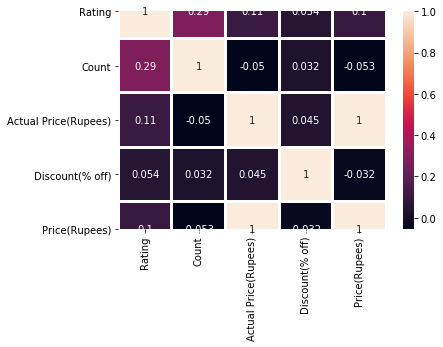

In [63]:
sns.heatmap(df.corr(),linecolor='white',linewidths=2,annot=True);

plt.savefig(r'C:\Users\Devi Vara Prasad\Desktop\Innomatics\Projects\Data mining-OYO\Plots\Correlation.jpeg') 

- All the columns in data set are weekly correlated.

Note: We have a strong relation between actual price, discount and price -- because the discount is same across hotels. 

# Exploratory Data Analysis

## Univarient Analysis

## Price

In [29]:
df['Price(Rupees)'].describe()

count     380.000000
mean     2312.631579
std       640.579303
min       858.000000
25%      2133.000000
50%      2413.000000
75%      2413.000000
max      6034.000000
Name: Price(Rupees), dtype: float64

In [33]:
df[df['Price(Rupees)']==df['Price(Rupees)'].max()]

,Hotel,Rating,Count,Location,Actual Price(Rupees),Discount(% off),Price(Rupees),Amenities,Parking,Card Payment,...,BreakFast,In-house Restaurant,Kitchen,TV,CCTV Cameras,First Aid,Power backup,Bar,Attached Bathroom,Other
3,Capital O 64180 Adam's Beach Resort,4.8,271.0,Baga Beach,10056,40,6034,"AC , First Aid , TV",No,No,...,No,No,No,Yes,No,Yes,No,No,No,No
45,Capital O 64180 Adam's Beach Resort,4.8,271.0,Calangute,10056,40,6034,"AC , First Aid , TV",No,No,...,No,No,No,Yes,No,Yes,No,No,No,No


In [31]:
df[df['Price(Rupees)']==df['Price(Rupees)'].min()]

,Hotel,Rating,Count,Location,Actual Price(Rupees),Discount(% off),Price(Rupees),Amenities,Parking,Card Payment,...,BreakFast,In-house Restaurant,Kitchen,TV,CCTV Cameras,First Aid,Power backup,Bar,Attached Bathroom,Other
61,SPOT ON 37412 Hotel Priti International SPOT,3.8,313.0,Mapusa,1430,40,858,"Kitchen , Attached Bathroom , CCTV Cameras",No,No,...,No,No,Yes,No,Yes,No,No,No,Yes,No


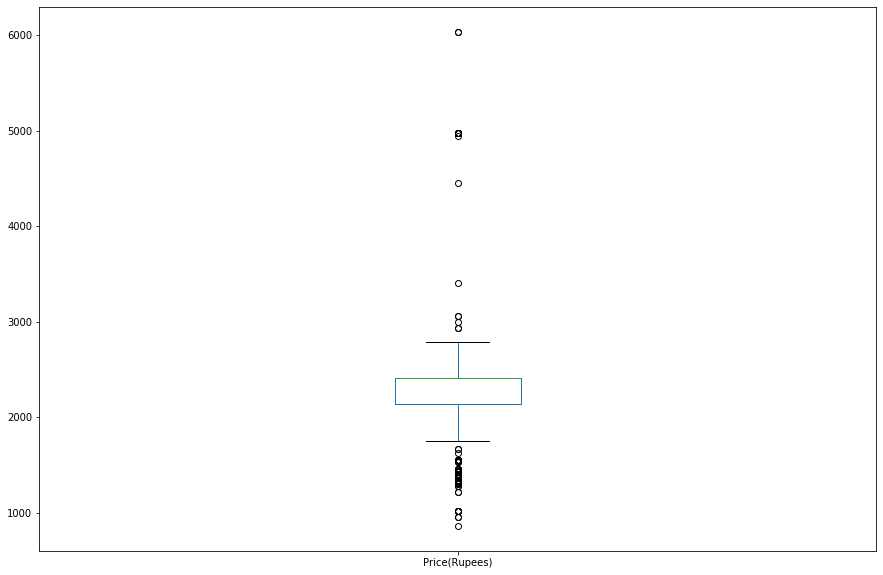

In [35]:
plt.figure(figsize=(15,10))
df['Price(Rupees)'].plot(kind='box');

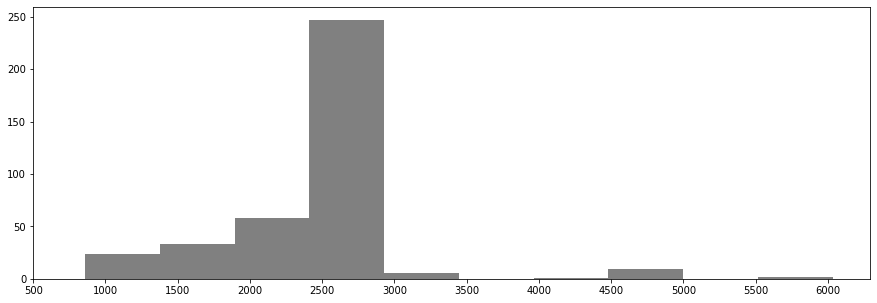

In [38]:
plt.figure(figsize=(15,5))
plt.hist(df['Price(Rupees)'], bins = 10, color='grey')
plt.xticks(np.arange(500,6500,500))
plt.show();

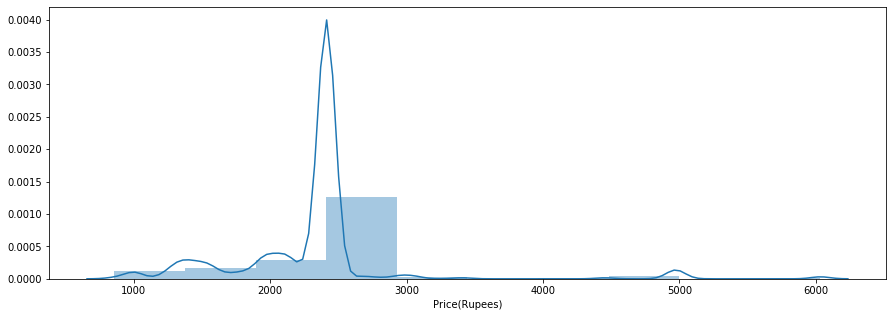

In [65]:
plt.figure(figsize=(15,5))
sns.distplot(df['Price(Rupees)'], bins=10)
plt.savefig(r'C:\Users\Devi Vara Prasad\Desktop\Innomatics\Projects\Data mining-OYO\Plots\uni-price.jpeg') 
plt.show();

### Univarient analysis on Price

- Hotels price in Goa range between 858-6034
- Least expensive hotel is SPOT ON 37412 Hotel Priti International in Mapusa with a rating of 3.8
- Most expensive hotel is Capital O 64180 Adam's Beach Resort in Baga Beach and Calangute with a rating of 4.8
- Median value for price is 2413 which is same as Q3 and almost equal to mean
- We can infer that the frequency distribution is a left skewed (Outliers are on the lower boundry side)
- Kernal density plot and histogram plot shows that there are max no. of hotels around the price range of 2400

## Rating

In [144]:
df['Rating'].min()
df['Rating'].max()

3.0

5.0

- Hotels in Goa has rating ranging between 3.0-5.0

In [145]:
df['Rating'].nunique()

21

In [146]:
df['Rating'].value_counts()

4.2    65
4.4    40
4.0    35
4.3    35
4.6    32
3.9    29
4.1    27
4.5    21
3.8    16
3.7    14
3.4    14
4.7    14
4.8     7
3.6     7
3.3     6
3.1     6
3.5     5
3.2     3
5.0     2
4.9     1
3.0     1
Name: Rating, dtype: int64

- Most number of hotels(65) have a rating of 4.2
- There are 40 hotels with a rating of 4.4

In [147]:
df['Rating'].describe()

count    380.000000
mean       4.140000
std        0.385119
min        3.000000
25%        3.900000
50%        4.200000
75%        4.400000
max        5.000000
Name: Rating, dtype: float64

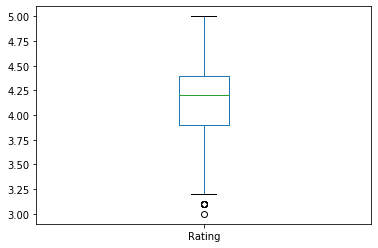

In [149]:
df["Rating"].plot(kind='box');

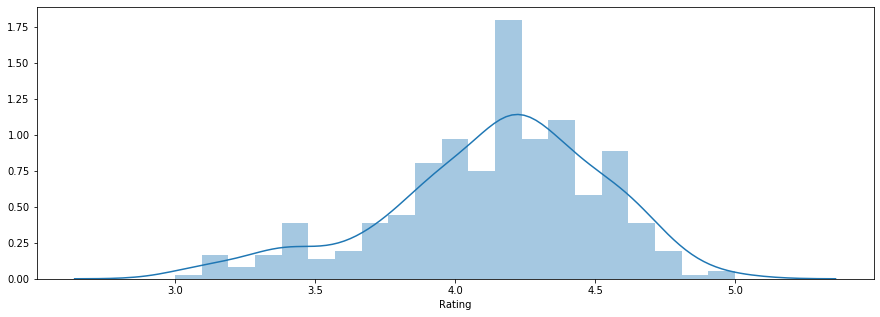

In [150]:
plt.figure(figsize=(15,5))
sns.distplot(df['Rating'], bins=21)
plt.show();

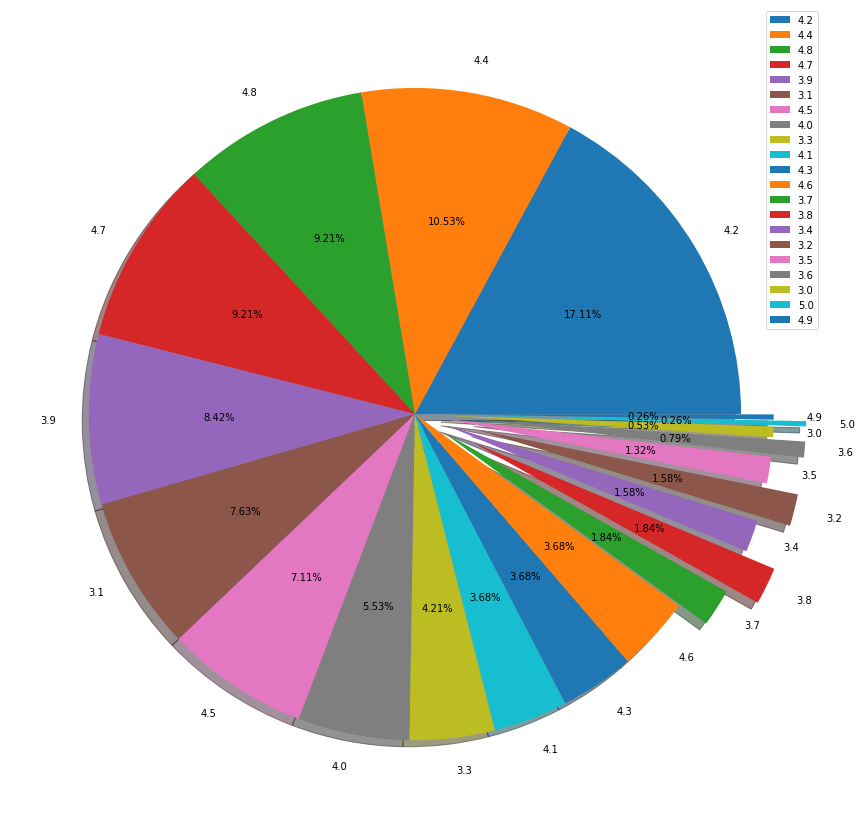

In [151]:
plt.figure(figsize=(15,15))
values=df['Rating'].value_counts()

labels=df['Rating'].unique()         

explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1 , 0.2, 0.1, 0.2, 0.1, 0.2, 0.1,0.2 , 0.1)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%0.2f%%')
plt.legend(labels,loc=0) # for best location
plt.show();

### Univarient analysis on Rating

- Hotels in Goa has rating ranging between 3.0-5.0
- Avg rating of hotels is 4.1
- Most number of hotels(65) have a rating of 4.2
- There are 40 hotels with a rating of 4.4

## Amenities

In [152]:
df[df.loc[:,'Parking':'Other']=='Yes'].notnull().sum()

Hotel                     0
Rating                    0
Count                     0
Location                  0
Actual Price(Rupees)      0
Discount(% off)           0
Price(Rupees)             0
Amenities                 0
Parking                 201
Card Payment             13
AC                      161
BreakFast                 4
In-house Restaurant      14
Kitchen                 142
TV                       77
CCTV Cameras            102
First Aid                59
Power backup             18
Bar                      14
Attached Bathroom       132
Other                   192
dtype: int64

In [153]:
amenities=['Parking','Card Payment', 'AC', 'BreakFast', 'In-house Restaurant', 'Kitchen',
       'TV', 'CCTV Cameras', 'First Aid', 'Power backup', 'Bar',
       'Attached Bathroom', 'Other']

amenities_count=[201,13,161,4,14,142,77,102,59,18,14,132,192]

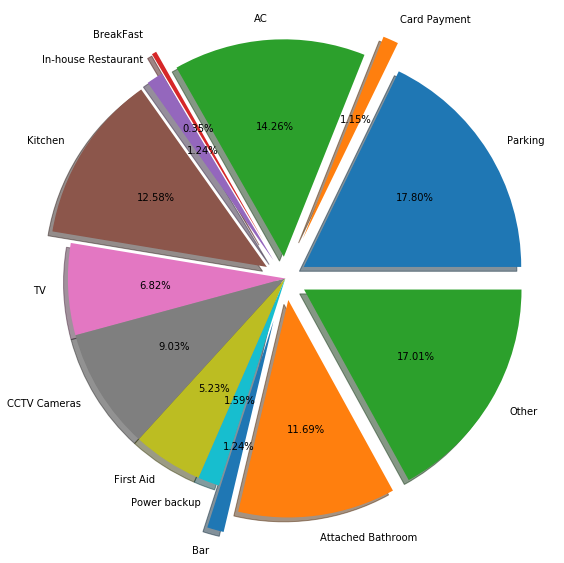

In [154]:
plt.figure(figsize=(15,10))
values = amenities_count
labels = amenities
explode=(0.1,0.2,0.1,0.2,0.1,0.1,0,0,0,0,0.2,0.1,0.1)
plt.pie(values,labels= labels,explode=explode,shadow=True,autopct='%0.2f%%')
plt.show();

- Most number of hotels in Goa offer the following amenities:
    - 17.80% Hotels offer parking facility
    - 14.26% Hotels have AC
    - 12.50% Hotels have Kitchen
    - 11.69 % Hotels have Attached bathrooms
    - 9.03% Hotels have CCTV Cameras

In [48]:
df[(df['Parking']=='Yes') & (df['AC']=='Yes') & (df['Kitchen']=='Yes') ]

# Selecting hotels with top three ameinities

,Hotel,Rating,Count,Location,Actual Price(Rupees),Discount(% off),Price(Rupees),Amenities,Parking,Card Payment,...,BreakFast,In-house Restaurant,Kitchen,TV,CCTV Cameras,First Aid,Power backup,Bar,Attached Bathroom,Other
23,OYO 14986 Charming 1 BHK,3.7,151.0,Panjim,4022,40,2413,"Parking Facility , Kitchen , AC",Yes,No,...,No,No,Yes,No,No,No,No,No,No,No
38,OYO 9355 Holy Cross Home Stay,4.6,346.0,Panjim,4022,40,2413,"Parking Facility , Kitchen , AC",Yes,No,...,No,No,Yes,No,No,No,No,No,No,No
74,OYO 12904 Modern 2BHK Asagaon,4.2,35.0,Mapusa,4022,40,2413,"Parking Facility , Kitchen , AC",Yes,No,...,No,No,Yes,No,No,No,No,No,No,No
77,OYO 19503 Designer 2BHK,4.6,61.0,Mapusa,4022,40,2413,"Parking Facility , Kitchen , AC",Yes,No,...,No,No,Yes,No,No,No,No,No,No,No
99,OYO Home 23726 Blissful Stay Near Cidade De Goa,3.9,81.0,Dabolim Airport,4022,40,2413,"Parking Facility , Kitchen , AC",Yes,No,...,No,No,Yes,No,No,No,No,No,No,No
119,OYO Home 23726 Blissful Stay Near Cidade De Goa,3.9,81.0,Vasco Da Gama,4022,40,2413,"Parking Facility , Kitchen , AC",Yes,No,...,No,No,Yes,No,No,No,No,No,No,No
122,OYO 16160 Spacious Stay,4.3,347.0,Madagaon RS,4022,40,2413,"Parking Facility , Kitchen , AC",Yes,No,...,No,No,Yes,No,No,No,No,No,No,No
127,OYO Home 18675 Modern Stay Madgaon Station,3.8,65.0,Madagaon RS,4022,40,2413,"Parking Facility , Kitchen , AC",Yes,No,...,No,No,Yes,No,No,No,No,No,No,No
134,OYO 9623 Beautiful 5BHK,3.4,20.0,Madagaon RS,4022,40,2413,"Parking Facility , Kitchen , AC",Yes,No,...,No,No,Yes,No,No,No,No,No,No,No
135,OYO 18328 Green View Studio,4.1,137.0,Madagaon RS,4022,40,2413,"Parking Facility , Kitchen , AC",Yes,No,...,No,No,Yes,No,No,No,No,No,No,No


In [49]:
df[(df['Parking']=='Yes') & (df['AC']=='Yes') & (df['Kitchen']=='Yes') ][['Hotel','Rating','Price(Rupees)']] 

# Hotels, Rating and prices with Parking, AC, Kitchen.

,Hotel,Rating,Price(Rupees)
23,OYO 14986 Charming 1 BHK,3.7,2413
38,OYO 9355 Holy Cross Home Stay,4.6,2413
74,OYO 12904 Modern 2BHK Asagaon,4.2,2413
77,OYO 19503 Designer 2BHK,4.6,2413
99,OYO Home 23726 Blissful Stay Near Cidade De Goa,3.9,2413
119,OYO Home 23726 Blissful Stay Near Cidade De Goa,3.9,2413
122,OYO 16160 Spacious Stay,4.3,2413
127,OYO Home 18675 Modern Stay Madgaon Station,3.8,2413
134,OYO 9623 Beautiful 5BHK,3.4,2413
135,OYO 18328 Green View Studio,4.1,2413


In [50]:
df[(df['Parking']=='Yes') & (df['AC']=='Yes') & (df['Kitchen']=='Yes') ][['Hotel','Rating','Price(Rupees)']].describe()

,Rating,Price(Rupees)
count,44.000000,44.0
mean,3.900000,2413.0
std,0.400581,0.0
min,3.100000,2413.0
25%,3.700000,2413.0
50%,3.900000,2413.0
75%,4.125000,2413.0
max,4.700000,2413.0


- All the hotels which offer parking AC and kitchen have same price - 2413
- Rating for these hotels range between 3.1-4.7 with average rating of 3.9

In [19]:
T_amenities= df[(df['Parking']=='Yes') & (df['AC']=='Yes') & (df['Kitchen']=='Yes') ]

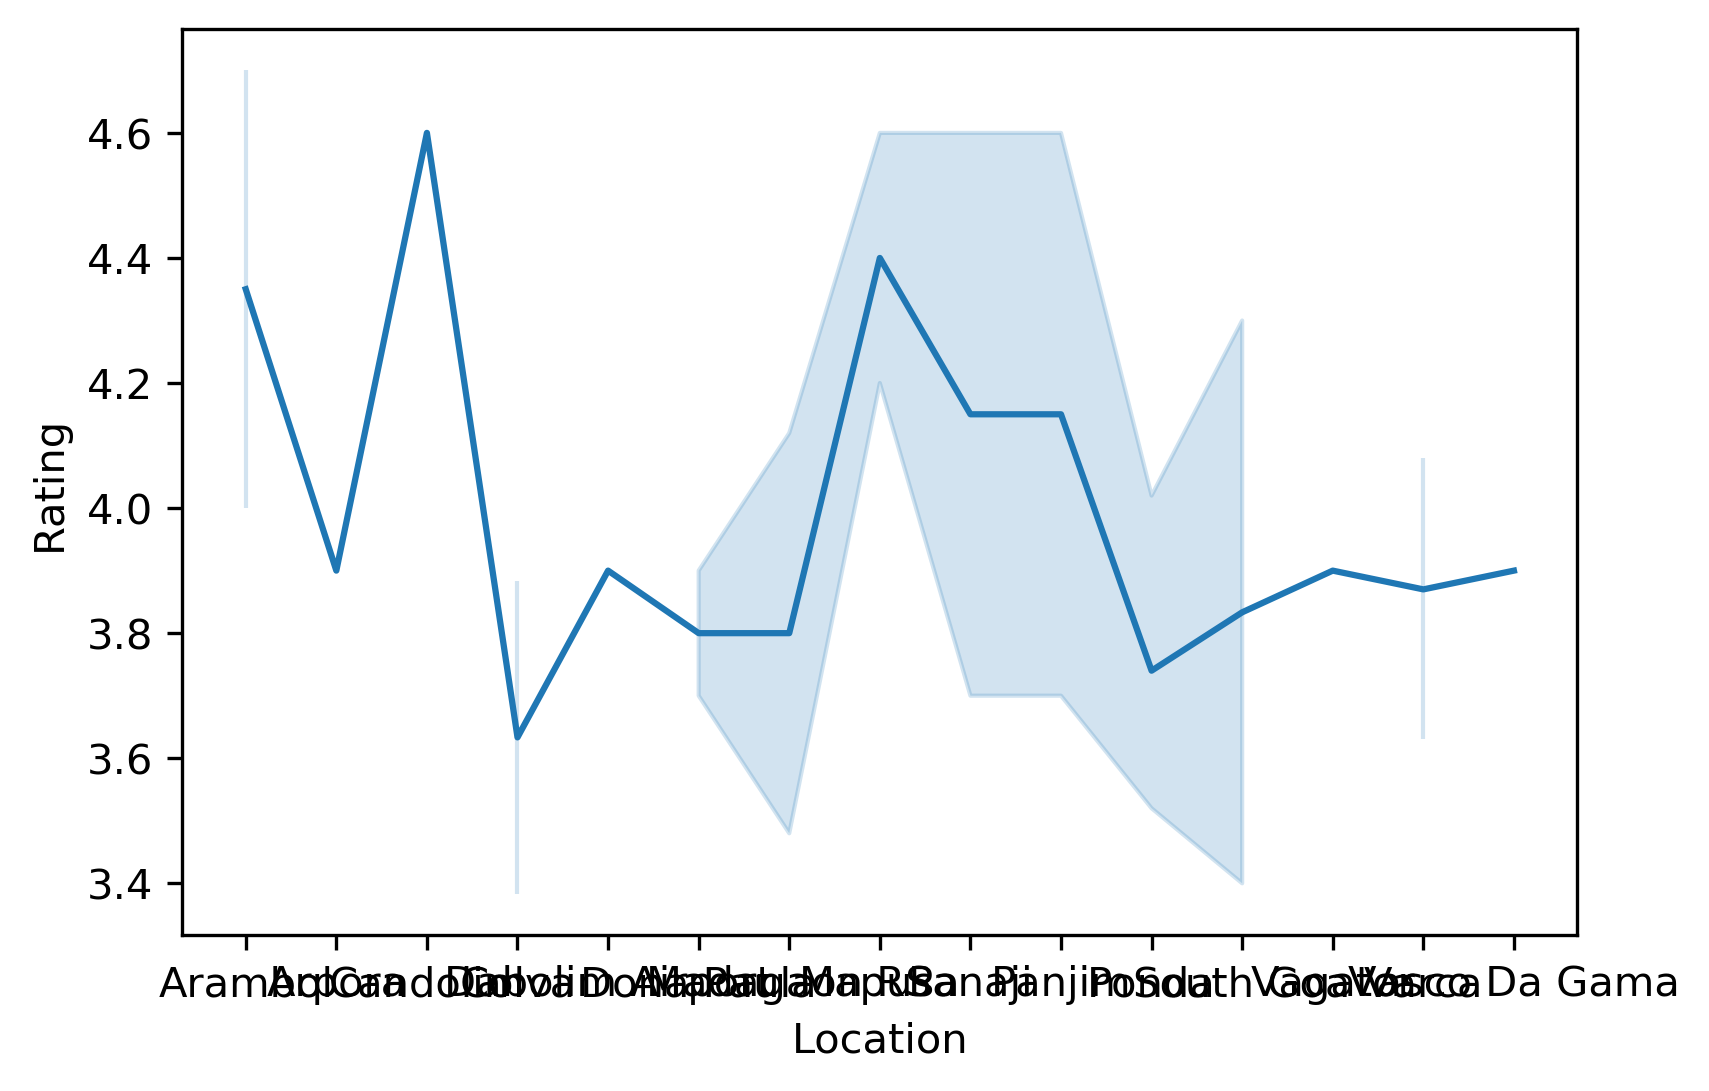

In [24]:
plt.figure(dpi=300)
sns.lineplot(x="Location", y="Rating", data=T_amenities);

In [40]:
T_amenities.groupby(['Location','Rating']).describe()

Count                                                   \
                       count   mean         std    min     25%    50%     75%   
Location        Rating                                                          
Arambol         4.0      1.0    3.0         NaN    3.0    3.00    3.0    3.00   
                4.7      1.0    8.0         NaN    8.0    8.00    8.0    8.00   
Arpora          3.9      1.0   81.0         NaN   81.0   81.00   81.0   81.00   
Candolim        4.6      1.0   73.0         NaN   73.0   73.00   73.0   73.00   
Colva           3.1      1.0   44.0         NaN   44.0   44.00   44.0   44.00   
                3.4      1.0   72.0         NaN   72.0   72.00   72.0   72.00   
                3.7      2.0   71.0   46.669048   38.0   54.50   71.0   87.50   
                3.8      1.0   66.0         NaN   66.0   66.00   66.0   66.00   
                4.1      1.0  137.0         NaN  137.0  137.00  137.0  137.00   
Dabolim Airport 3.9      1.0   81.0         NaN   81.0   81.00   81.0   81.00   
Dona Paula      3.7      1.0  151.0         NaN  151.0  151.00  151.0  151.00   
                3.9      1.0   81.0         NaN   81.0   81.00   81.0   81.00   
Madagaon RS     3.4      2.0   46.0   36.769553   20.0   33.00   46.0   59.00   
                3.8      1.0   65.0         NaN   65.0   65.00   65.0   65.00   
                4.1      1.0  137.0         NaN  137.0  137.00  137.0  137.00   
                4.3      1.0  347.0         NaN  347.0  347.00  347.0  347.00   
Mapusa          4.2      1.0   35.0         NaN   35.0   35.00   35.0   35.00   
                4.6      1.0   61.0         NaN   61.0   61.00   61.0   61.00   
Panaji          3.7      1.0  151.0         NaN  151.0  151.00  151.0  151.00   
                4.6      1.0  346.0         NaN  346.0  346.00  346.0  346.00   
Panjim          3.7      1.0  151.0         NaN  151.0  151.00  151.0  151.00   
                4.6      1.0  346.0         NaN  346.0  346.00  346.0  346.00   
Ponda           3.4      1.0   20.0         NaN   20.0   20.00   20.0   20.00   
                3.6      2.0  119.0  127.279221   29.0   74.00  119.0  164.00   
                3.8      1.0  101.0         NaN  101.0  101.00  101.0  101.00   
                4.3      1.0  347.0         NaN  347.0  347.00  347.0  347.00   
South Goa       3.4      1.0   20.0         NaN   20.0   20.00   20.0   20.00   
                3.8      1.0   65.0         NaN   65.0   65.00   65.0   65.00   
                4.3      1.0  347.0         NaN  347.0  347.00  347.0  347.00   
Vagator         3.9      1.0   43.0         NaN   43.0   43.00   43.0   43.00   
Varca           3.2      1.0   27.0         NaN   27.0   27.00   27.0   27.00   
                3.4      1.0   72.0         NaN   72.0   72.00   72.0   72.00   
                3.7      2.0   80.5   60.104076   38.0   59.25   80.5  101.75   
                3.9      1.0   46.0         NaN   46.0   46.00   46.0   46.00   
                4.0      2.0  132.0   97.580736   63.0   97.50  132.0  166.50   
                4.1      1.0   55.0         NaN   55.0   55.00   55.0   55.00   
                4.2      1.0   84.0         NaN   84.0   84.00   84.0   84.00   
                4.5      1.0   44.0         NaN   44.0   44.00   44.0   44.00   
Vasco Da Gama   3.9      1.0   81.0         NaN   81.0   81.00   81.0   81.00   

                              Actual Price(Rupees)          ...  \
                          max                count    mean  ...   
Location        Rating                                      ...   
Arambol         4.0       3.0                  1.0  4022.0  ...   
                4.7       8.0                  1.0  4022.0  ...   
Arpora          3.9      81.0                  1.0  4022.0  ...   
Candolim        4.6      73.0                  1.0  4022.0  ...   
Colva           3.1      44.0                  1.0  4022.0  ...   
                3.4      72.0                  1.0  4022.0  ...   
                3

- Arambol has highest rated hotel (4.7) with parking AC and kitchen facilities
- Colva has Lowest rated hotel (3.1) with parking AC and kitchen facilities

In [155]:
df['Parking'].value_counts()

Yes    201
No     179
Name: Parking, dtype: int64

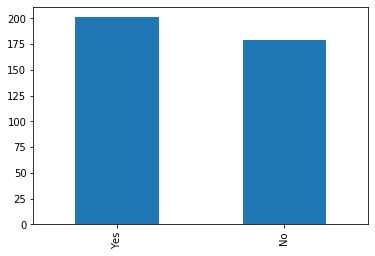

In [156]:
df["Parking"].value_counts().plot(kind='bar')

In [157]:
df['Card Payment'].value_counts()

No     367
Yes     13
Name: Card Payment, dtype: int64

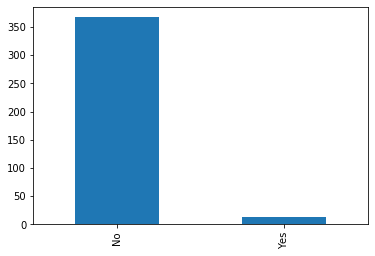

In [158]:
df['Card Payment'].value_counts().plot(kind='bar')

In [159]:
df['AC'].value_counts()

No     219
Yes    161
Name: AC, dtype: int64

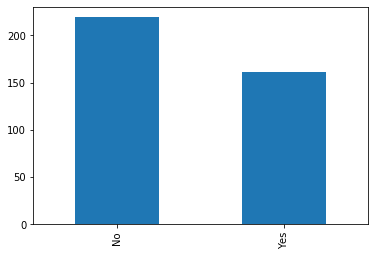

In [160]:
df['AC'].value_counts().plot(kind='bar')

In [161]:
df['BreakFast'].value_counts()

No     376
Yes      4
Name: BreakFast, dtype: int64

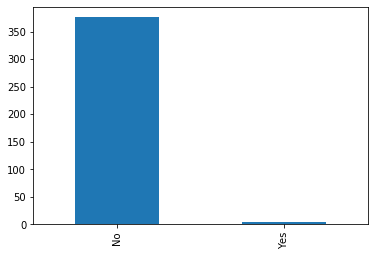

In [162]:
df['BreakFast'].value_counts().plot(kind='bar')

In [163]:
df['In-house Restaurant'].value_counts()

No     366
Yes     14
Name: In-house Restaurant, dtype: int64

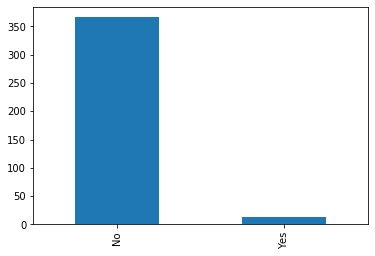

In [164]:
df['In-house Restaurant'].value_counts().plot(kind='bar')

In [165]:
df['Kitchen'].value_counts()

No     238
Yes    142
Name: Kitchen, dtype: int64

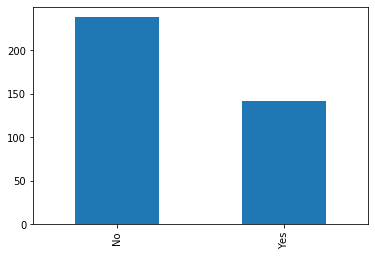

In [166]:
df['Kitchen'].value_counts().plot(kind='bar')

In [167]:
df['TV'].value_counts()

No     303
Yes     77
Name: TV, dtype: int64

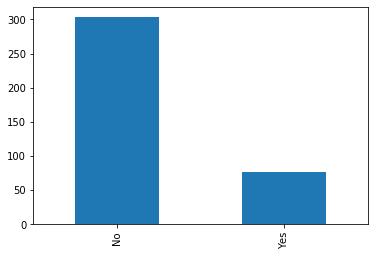

In [168]:
df['TV'].value_counts().plot(kind='bar')

In [169]:
df['CCTV Cameras'].value_counts()

No     278
Yes    102
Name: CCTV Cameras, dtype: int64

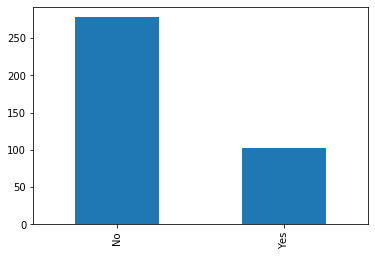

In [170]:
df['CCTV Cameras'].value_counts().plot(kind='bar')

In [171]:
df['First Aid'].value_counts()

No     321
Yes     59
Name: First Aid, dtype: int64

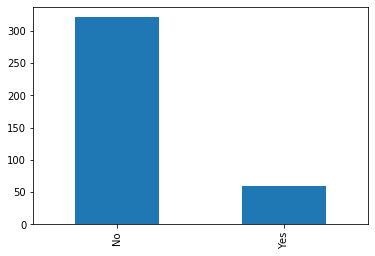

In [172]:
df['First Aid'].value_counts().plot(kind='bar')

In [173]:
df['Power backup'].value_counts()

No     362
Yes     18
Name: Power backup, dtype: int64

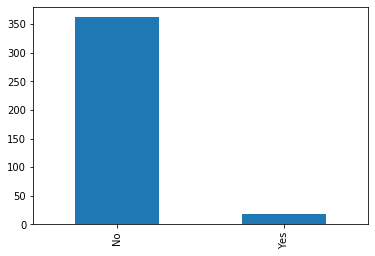

In [174]:
df['Power backup'].value_counts().plot(kind='bar')

In [175]:
df['Bar'].value_counts()

No     366
Yes     14
Name: Bar, dtype: int64

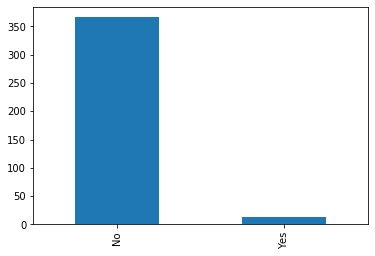

In [176]:
df['Bar'].value_counts().plot(kind='bar')

In [177]:
df['Attached Bathroom'].value_counts()

No     248
Yes    132
Name: Attached Bathroom, dtype: int64

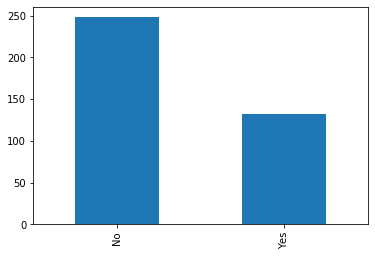

In [178]:
df['Attached Bathroom'].value_counts().plot(kind='bar')

In [179]:
df['Other'].value_counts()

Yes    192
No     188
Name: Other, dtype: int64

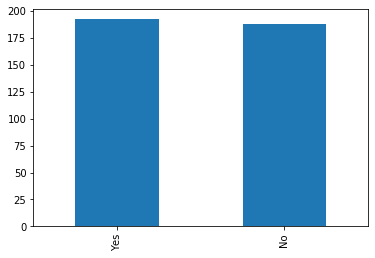

In [180]:
df['Other'].value_counts().plot(kind='bar')

### Univarient analysis on Amenities

- Most number of hotels in Goa offer the following amenities:
    - 17.80% Hotels offer parking facility
    - 14.26% Hotels have AC
    - 12.50% Hotels have Kitchen
    - 11.69 % Hotels have Attached bathrooms
    - 9.03% Hotels have CCTV Cameras
- All the hotels which offer parking AC and kitchen have same price - 2413
- Rating for these hotels range between 3.1-4.7 with average rating of 3.9
- Arambol has highest rated hotel (4.7) with parking AC and kitchen facilities
- Colva has Lowest rated hotel (3.1) with parking AC and kitchen facilities

## Location

In [181]:
df['Location'].describe()

count           380
unique           19
top       Calangute
freq             20
Name: Location, dtype: object

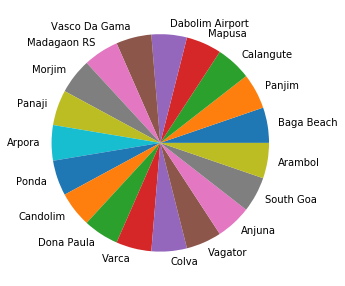

In [182]:
plt.figure(figsize=(5,5))
values=df['Location'].value_counts()
labels=df['Location'].unique()

plt.pie(values,labels=labels)
plt.show();

- There are 18 different locations in Goa and each location have 20 hotels

## Hotels

In [66]:
df.sort_values(by='Rating',ascending=False)

# Hotels sorted in descending order with respect to rating

,Hotel,Rating,Count,Location,Actual Price(Rupees),Discount(% off),Price(Rupees),Amenities,Parking,Card Payment,...,BreakFast,In-house Restaurant,Kitchen,TV,CCTV Cameras,First Aid,Power backup,Bar,Attached Bathroom,Other
368,OYO Home 24689 Classic 2BHK Near Mandrem Beach,5.0,1.0,Arambol,4022,40,2413,"Kitchen , Attached Bathroom , CCTV Cameras",No,No,...,No,No,Yes,No,Yes,No,No,No,Yes,No
361,SPOT ON 64361 Casa Arambol Homestay SPOT,5.0,7.0,Arambol,2907,40,1744,"Parking Facility , Attached Bathroom , CCTV C...",Yes,No,...,No,No,No,No,Yes,No,No,No,Yes,No
372,OYO Home 17363 Nature View Stay,4.9,3.0,Arambol,8232,40,4939,"Parking Facility , AC , TV",Yes,No,...,No,No,No,Yes,No,No,No,No,No,No
379,OYO 22742 Graceful Stay Morjim,4.8,25.0,Arambol,4022,40,2413,"Kitchen , AC , Attached Bathroom",No,No,...,No,No,Yes,No,No,No,No,No,Yes,No
323,OYO 68736 Dhuni Resorts,4.8,134.0,Anjuna,3477,40,2086,"Parking Facility , First Aid , Attached Bathr...",Yes,No,...,No,No,No,No,No,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,OYO 48814 Rustic Village - By Rivasa,3.1,45.0,Baga Beach,3573,40,2144,"Parking Facility , First Aid , Attached Bathr...",Yes,No,...,No,No,No,No,No,Yes,No,No,Yes,No
44,OYO 48814 Rustic Village - By Rivasa,3.1,45.0,Calangute,3573,40,2144,"Parking Facility , First Aid , Attached Bathr...",Yes,No,...,No,No,No,No,No,Yes,No,No,Yes,No
230,OYO 3043 Grande Ave Maria Resort,3.1,230.0,Candolim,3776,40,2266,"First Aid , Daily Housekeeping , Swimming Pool",No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
138,OYO 28305 Sunset Holiday Homes,3.1,21.0,Madagaon RS,3092,40,1855,"Daily Housekeeping , AC , Power backup",No,No,...,No,No,No,No,No,No,Yes,No,No,Yes


In [76]:
df.sort_values(by='Rating',ascending=False).head(10)

,Hotel,Rating,Count,Location,Actual Price(Rupees),Discount(% off),Price(Rupees),Amenities,Parking,Card Payment,...,BreakFast,In-house Restaurant,Kitchen,TV,CCTV Cameras,First Aid,Power backup,Bar,Attached Bathroom,Other
368,OYO Home 24689 Classic 2BHK Near Mandrem Beach,5.0,1.0,Arambol,4022,40,2413,"Kitchen , Attached Bathroom , CCTV Cameras",No,No,...,No,No,Yes,No,Yes,No,No,No,Yes,No
361,SPOT ON 64361 Casa Arambol Homestay SPOT,5.0,7.0,Arambol,2907,40,1744,"Parking Facility , Attached Bathroom , CCTV C...",Yes,No,...,No,No,No,No,Yes,No,No,No,Yes,No
372,OYO Home 17363 Nature View Stay,4.9,3.0,Arambol,8232,40,4939,"Parking Facility , AC , TV",Yes,No,...,No,No,No,Yes,No,No,No,No,No,No
379,OYO 22742 Graceful Stay Morjim,4.8,25.0,Arambol,4022,40,2413,"Kitchen , AC , Attached Bathroom",No,No,...,No,No,Yes,No,No,No,No,No,Yes,No
323,OYO 68736 Dhuni Resorts,4.8,134.0,Anjuna,3477,40,2086,"Parking Facility , First Aid , Attached Bathr...",Yes,No,...,No,No,No,No,No,Yes,No,No,Yes,No
3,Capital O 64180 Adam's Beach Resort,4.8,271.0,Baga Beach,10056,40,6034,"AC , First Aid , TV",No,No,...,No,No,No,Yes,No,Yes,No,No,No,No
45,Capital O 64180 Adam's Beach Resort,4.8,271.0,Calangute,10056,40,6034,"AC , First Aid , TV",No,No,...,No,No,No,Yes,No,Yes,No,No,No,No
318,OYO 68736 Dhuni Resorts,4.8,134.0,Vagator,3477,40,2086,"Parking Facility , First Aid , Attached Bathr...",Yes,No,...,No,No,No,No,No,Yes,No,No,Yes,No
291,OYO 12855 The Goan Courtyard,4.8,92.0,Colva,2398,40,1439,"Parking Facility , CCTV Cameras , Geyser",Yes,No,...,No,No,No,No,Yes,No,No,No,No,Yes
144,OYO 22742 Graceful Stay Morjim,4.8,25.0,Morjim,4022,40,2413,"Kitchen , AC , Attached Bathroom",No,No,...,No,No,Yes,No,No,No,No,No,Yes,No


In [73]:
df.sort_values(by='Rating',ascending=False).head(10).describe()

,Rating,Count,Actual Price(Rupees),Discount(% off),Price(Rupees)
count,10.000000,10.000000,10.000000,10.0,10.000000
mean,4.850000,96.300000,5266.900000,40.0,3160.100000
std,0.084984,105.319672,2972.453212,0.0,1783.643864
min,4.800000,1.000000,2398.000000,40.0,1439.000000
25%,4.800000,11.500000,3477.000000,40.0,2086.000000
50%,4.800000,58.500000,4022.000000,40.0,2413.000000
75%,4.875000,134.000000,7179.500000,40.0,4307.500000
max,5.000000,271.000000,10056.000000,40.0,6034.000000


- Average price of top 10 highest rated hotels in goa is 3160 ranging between 1439-6034
- Highest rated hotels with a rating of 5 are
    - OYO Home 24689 Classic 2BHK Near Mandrem Beach(Price=2413 , Location= Arambol)
    - SPOT ON 64361 Casa Arambol Homestay SPOT(Price=1744 , Location= Arambol)
- Lowest priced hotel is OYO 12855 The Goan Courtyard(Price=1439, Location=Colva)
- Out of these 10 hotels top 4 are located in Arambol
- Common amenities provided in these top 10 hotels are AC and Attached Bathroom

In [77]:
df.sort_values(by='Price(Rupees)')

# Hotels sorted in ascending order with respect to Rupees

,Hotel,Rating,Count,Location,Actual Price(Rupees),Discount(% off),Price(Rupees),Amenities,Parking,Card Payment,...,BreakFast,In-house Restaurant,Kitchen,TV,CCTV Cameras,First Aid,Power backup,Bar,Attached Bathroom,Other
61,SPOT ON 37412 Hotel Priti International SPOT,3.8,313.0,Mapusa,1430,40,858,"Kitchen , Attached Bathroom , CCTV Cameras",No,No,...,No,No,Yes,No,Yes,No,No,No,Yes,No
129,SPOT ON 40731 Hotel Raviraj Classic SPOT,4.6,895.0,Madagaon RS,1586,40,952,"Parking Facility , First Aid , Attached Bathr...",Yes,No,...,No,No,No,No,No,Yes,No,No,Yes,No
353,SPOT ON 40731 Hotel Raviraj Classic SPOT,4.6,895.0,South Goa,1586,40,952,"Parking Facility , First Aid , Attached Bathr...",Yes,No,...,No,No,No,No,No,Yes,No,No,Yes,No
148,OYO 8065 Accovah Map5 Inn,3.6,140.0,Morjim,1753,42,1014,"CCTV Cameras , Geyser , Electric Kettle",No,No,...,No,No,No,No,Yes,No,No,No,No,Yes
143,OYO 22417 Pleasure Inn,3.5,22.0,Morjim,1690,40,1014,"Kitchen , Attached Bathroom , Daily Housekeep...",No,No,...,No,No,Yes,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,OYO 68706 Shantie Shakthi Deluxe,4.5,25.0,Vagator,8295,40,4977,"Parking Facility , Attached Bathroom , CCTV C...",Yes,No,...,No,No,No,No,Yes,No,No,No,Yes,No
307,OYO 68655 Casa Paradise Deluxe,3.7,10.0,Vagator,8295,40,4977,"Attached Bathroom , CCTV Cameras , Swimming P...",No,No,...,No,No,No,No,Yes,No,No,No,Yes,Yes
0,OYO 70321 David Guest House,4.2,112.0,Baga Beach,8295,40,4977,"First Aid , Attached Bathroom , Daily Houseke...",No,No,...,No,No,No,No,No,Yes,No,No,Yes,Yes
45,Capital O 64180 Adam's Beach Resort,4.8,271.0,Calangute,10056,40,6034,"AC , First Aid , TV",No,No,...,No,No,No,Yes,No,Yes,No,No,No,No


In [83]:
df.sort_values(by='Price(Rupees)').head(10)

,Hotel,Rating,Count,Location,Actual Price(Rupees),Discount(% off),Price(Rupees),Amenities,Parking,Card Payment,...,BreakFast,In-house Restaurant,Kitchen,TV,CCTV Cameras,First Aid,Power backup,Bar,Attached Bathroom,Other
61,SPOT ON 37412 Hotel Priti International SPOT,3.8,313.0,Mapusa,1430,40,858,"Kitchen , Attached Bathroom , CCTV Cameras",No,No,...,No,No,Yes,No,Yes,No,No,No,Yes,No
129,SPOT ON 40731 Hotel Raviraj Classic SPOT,4.6,895.0,Madagaon RS,1586,40,952,"Parking Facility , First Aid , Attached Bathr...",Yes,No,...,No,No,No,No,No,Yes,No,No,Yes,No
353,SPOT ON 40731 Hotel Raviraj Classic SPOT,4.6,895.0,South Goa,1586,40,952,"Parking Facility , First Aid , Attached Bathr...",Yes,No,...,No,No,No,No,No,Yes,No,No,Yes,No
148,OYO 8065 Accovah Map5 Inn,3.6,140.0,Morjim,1753,42,1014,"CCTV Cameras , Geyser , Electric Kettle",No,No,...,No,No,No,No,Yes,No,No,No,No,Yes
143,OYO 22417 Pleasure Inn,3.5,22.0,Morjim,1690,40,1014,"Kitchen , Attached Bathroom , Daily Housekeep...",No,No,...,No,No,Yes,No,No,No,No,No,Yes,Yes
202,SPOT ON 44584 Hotel Vaishali Residency SPOT,4.1,128.0,Ponda,1690,40,1014,"Parking Facility , In-house Restaurant , AC",Yes,No,...,No,Yes,No,No,No,No,No,No,No,Yes
342,SPOT ON 66016 Grand Villas 2 SPOT,4.1,45.0,South Goa,1690,40,1014,"Parking Facility , First Aid , Attached Bathr...",Yes,No,...,No,No,No,No,No,Yes,No,No,Yes,No
378,OYO 8065 Accovah Map5 Inn,3.6,140.0,Arambol,1753,42,1014,"CCTV Cameras , Geyser , Electric Kettle",No,No,...,No,No,No,No,Yes,No,No,No,No,Yes
350,SPOT ON 38006 Hotel City Central SPOT,3.8,513.0,South Goa,2026,40,1216,"First Aid , Attached Bathroom , Daily Houseke...",No,No,...,No,No,No,No,No,Yes,No,No,Yes,Yes
201,SPOT ON 38006 Hotel City Central SPOT,3.8,513.0,Ponda,2026,40,1216,"First Aid , Attached Bathroom , Daily Houseke...",No,No,...,No,No,No,No,No,Yes,No,No,Yes,Yes


In [79]:
df.sort_values(by='Price(Rupees)').head(10).describe()

,Rating,Count,Actual Price(Rupees),Discount(% off),Price(Rupees)
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3.950000,360.400000,1723.000000,40.400000,1026.400000
std,0.395109,330.919326,186.211349,0.843274,111.601673
min,3.500000,22.000000,1430.000000,40.000000,858.000000
25%,3.650000,131.000000,1612.000000,40.000000,967.500000
50%,3.800000,226.500000,1690.000000,40.000000,1014.000000
75%,4.100000,513.000000,1753.000000,40.000000,1014.000000
max,4.600000,895.000000,2026.000000,42.000000,1216.000000


- Average rating of 10 hotels with lowest price in Goa is 3.95 ranging between 3.5-4.6
- South Goa has 3 hotels out of these 10 lowest priced hotels. 

### Univarient analysis on Hotel
- Average price of top 10 highest rated hotels in goa is 3160 ranging between 1439-6034
- Highest rated hotels with a rating of 5 are
    - OYO Home 24689 Classic 2BHK Near Mandrem Beach(Price=2413 , Location= Arambol)
    - SPOT ON 64361 Casa Arambol Homestay SPOT(Price=1744 , Location= Arambol)
- Lowest priced hotel is OYO 12855 The Goan Courtyard(Price=1439, Location=Colva)
- Out of these 10 hotels top 4 are located in Arambol
- Common amenities provided in these top 10 hotels are AC and Attached Bathroom
- Average rating of 10 hotels with lowest price in Goa is 3.95 ranging between 3.5-4.6
- South Goa has 3 hotels out of these 10 lowest priced hotels. 

In [87]:
print('*'*100)

****************************************************************************************************


# Univarient Analysis

**There are 18 different locations in Goa and each location have 20 hotels**

### Univarient analysis on Price

- Hotels price in Goa range between 858-6034
- Least expensive hotel is SPOT ON 37412 Hotel Priti International in Mapusa with a rating of 3.8
- Most expensive hotel is Capital O 64180 Adam's Beach Resort in Baga Beach and Calangute with a rating of 4.8
- Median value for price is 2413 which is same as Q3 and almost equal to **mean**
- We can infer that the frequency distribution is a left skewed (Outliers are on the lower boundry side)

### Univarient analysis on Rating

- Hotels in Goa has rating ranging between 3.0-5.0
- Avg rating of hotels is 4.1
- Most number of hotels(65) have a rating of 4.2
- There are 40 hotels with a rating of 4.4


### Univarient analysis on Amenities

- Most number of hotels in Goa offer the following amenities:
    - 17.80% Hotels offer parking facility
    - 14.26% Hotels have AC
    - 12.50% Hotels have Kitchen
    - 11.69 % Hotels have Attached bathrooms
    - 9.03% Hotels have CCTV Cameras
- All the hotels which offer parking AC and kitchen have same price - 2413
- Rating for these hotels range between 3.1-4.7 with average rating of 3.9
- Arambol has highest rated hotel (4.7) with parking AC and kitchen facilities
- Colva has Lowest rated hotel (3.1) with parking AC and kitchen facilities

### Univarient analysis on Hotel
- Average price of top 10 highest rated hotels in goa is 3160 ranging between 1439-6034
- Highest rated hotels with a rating of 5 are
    - OYO Home 24689 Classic 2BHK Near Mandrem Beach(Price=2413 , Location= Arambol)
    - SPOT ON 64361 Casa Arambol Homestay SPOT(Price=1744 , Location= Arambol)
- Lowest priced hotel is OYO 12855 The Goan Courtyard(Price=1439, Location=Colva)
- Out of these 10 hotels top 4 are located in Arambol
- Common amenities provided in these top 10 hotels are AC and Attached Bathroom
- Average rating of 10 hotels with lowest price in Goa is 3.95 ranging between 3.5-4.6
- South Goa has 3 hotels out of these 10 lowest priced hotels.  


In [88]:
print('*'*100)

****************************************************************************************************


# Bi Varient Analysis

## Price vs Location

In [48]:
df.groupby(['Location']).describe()['Price(Rupees)']

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Anjuna,20.0,2464.65,654.641989,1459.0,2382.25,2413.0,2413.0,4977.0
Arambol,20.0,2187.30,820.864121,1014.0,1667.25,2413.0,2413.0,4939.0
Arpora,20.0,2341.25,205.171526,1555.0,2413.00,2413.0,2413.0,2413.0
Baga Beach,20.0,2557.10,1057.796712,1360.0,2112.25,2413.0,2413.0,6034.0
Calangute,20.0,2614.20,1019.559327,1927.0,2253.50,2413.0,2413.0,6034.0
Candolim,20.0,2529.95,859.896045,1442.0,2284.75,2413.0,2413.0,4977.0
Colva,20.0,2172.25,466.995083,1315.0,1838.50,2413.0,2413.0,2936.0
Dabolim Airport,20.0,2341.25,205.171526,1555.0,2413.00,2413.0,2413.0,2413.0
Dona Paula,20.0,2317.95,173.621329,1931.0,2343.00,2413.0,2413.0,2413.0


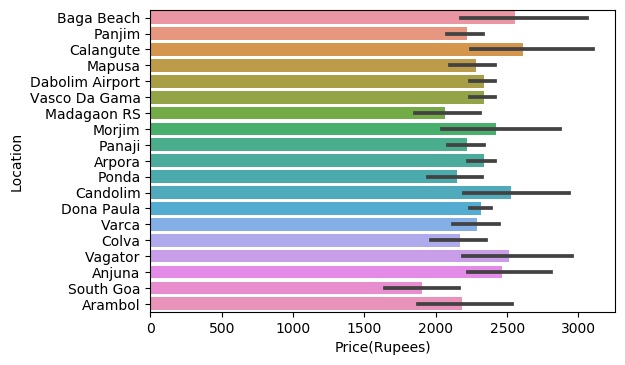

In [55]:
plt.figure(dpi=100)
sns.barplot(x="Price(Rupees)", y="Location", data =df);

# Bar plot for Price VS Location 

- Hotels in Baga Beach, Calangute, Candolim, Vagator, Anjuna have high prices.

## Price VS Rating

In [56]:
df.groupby(['Rating']).describe()['Price(Rupees)']

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
3.0,1.0,2413.000000,NaN,2413.0,2413.00,2413.0,2413.00,2413.0
3.1,6.0,2112.833333,222.916502,1855.0,1927.25,2144.0,2235.50,2413.0
3.2,3.0,2046.000000,635.662646,1312.0,1862.50,2413.0,2413.00,2413.0
3.3,6.0,2425.333333,451.339636,1927.0,2048.50,2413.0,2805.25,2936.0
3.4,14.0,2064.285714,412.018750,1543.0,1550.00,2276.5,2413.00,2413.0
3.5,5.0,1558.600000,517.692766,1014.0,1408.00,1408.0,1550.00,2413.0
3.6,7.0,2002.857143,740.304088,1014.0,1550.00,2086.0,2413.00,2994.0
3.7,14.0,2934.500000,1109.471860,2144.0,2413.00,2413.0,2413.00,4977.0
3.8,16.0,2073.250000,584.250118,858.0,1787.00,2413.0,2413.00,2676.0


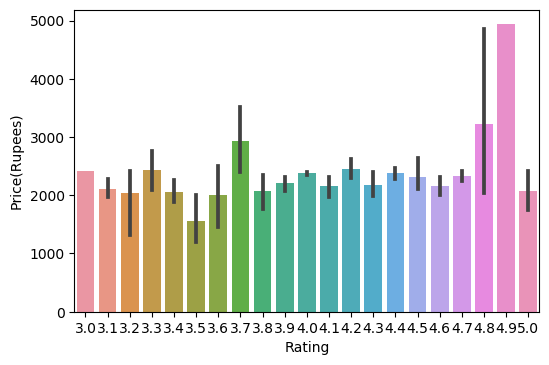

In [58]:
plt.figure(dpi=100)
sns.barplot(x="Rating", y="Price(Rupees)", data =df);

# Bar plot for Price VS Rating 

- Hotels with 4.8 and 4.9 rating are expensive

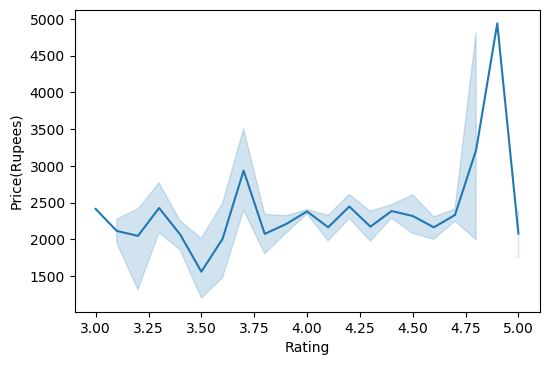

In [57]:
plt.figure(dpi=100)
sns.lineplot(x="Rating", y="Price(Rupees)", data=df);

- hotels with rating from 3.75 to 4.75 has almost same price range 2000-2500

## Price Vs Amenities

In [60]:
df[(df['Parking']=='Yes')& (df['Bar']=='Yes')]

,Hotel,Rating,Count,Location,Actual Price(Rupees),Discount(% off),Price(Rupees),Amenities,Parking,Card Payment,...,BreakFast,In-house Restaurant,Kitchen,TV,CCTV Cameras,First Aid,Power backup,Bar,Attached Bathroom,Other
70,OYO 71530 Sentosa Villa,4.2,112.0,Mapusa,4022,40,2413,"Parking Facility , First Aid , Bar",Yes,No,...,No,No,No,No,No,Yes,No,Yes,No,No
121,CAPITAL O5563 Hotel Sapphire Deluxe,4.2,112.0,Madagaon RS,4022,40,2413,"Parking Facility , Bar , Attached Bathroom",Yes,No,...,No,No,No,No,No,No,No,Yes,Yes,No
141,Capital O 8058 Map5 Village Resort,4.4,432.0,Morjim,6275,56,2786,"Parking Facility , Kitchen , Bar",Yes,No,...,No,No,Yes,No,No,No,No,Yes,No,No
146,OYO 70630 Sai Coco Resort Morjim,4.2,112.0,Morjim,8295,40,4977,"Parking Facility , Bar , Attached Bathroom",Yes,No,...,No,No,No,No,No,No,No,Yes,Yes,No
205,OYO 19393 Waters Edge,3.9,27.0,Ponda,3335,40,2001,"Parking Facility , Bar , CCTV Cameras",Yes,No,...,No,No,No,No,Yes,No,No,Yes,No,No
211,CAPITAL O5563 Hotel Sapphire Deluxe,4.2,112.0,Ponda,4022,40,2413,"Parking Facility , Bar , Attached Bathroom",Yes,No,...,No,No,No,No,No,No,No,Yes,Yes,No
239,OYO 3273 Eden Garden,3.7,106.0,Candolim,3573,40,2144,"Parking Facility , Bar , Daily Housekeeping",Yes,No,...,No,No,No,No,No,No,No,Yes,No,Yes
356,CAPITAL O5563 Hotel Sapphire Deluxe,4.2,112.0,South Goa,4022,40,2413,"Parking Facility , Bar , Attached Bathroom",Yes,No,...,No,No,No,No,No,No,No,Yes,Yes,No


In [59]:
df[(df['Parking']=='Yes')& (df['Bar']=='Yes')][['Hotel','Rating','Price(Rupees)']]

,Hotel,Rating,Price(Rupees)
70,OYO 71530 Sentosa Villa,4.2,2413
121,CAPITAL O5563 Hotel Sapphire Deluxe,4.2,2413
141,Capital O 8058 Map5 Village Resort,4.4,2786
146,OYO 70630 Sai Coco Resort Morjim,4.2,4977
205,OYO 19393 Waters Edge,3.9,2001
211,CAPITAL O5563 Hotel Sapphire Deluxe,4.2,2413
239,OYO 3273 Eden Garden,3.7,2144
356,CAPITAL O5563 Hotel Sapphire Deluxe,4.2,2413


In [60]:
df[(df['Parking']=='Yes')& (df['Bar']=='Yes')][['Hotel','Rating','Price(Rupees)']].describe()

,Rating,Price(Rupees)
count,8.000000,8.00000
mean,4.125000,2695.00000
std,0.218763,950.12315
min,3.700000,2001.00000
25%,4.125000,2345.75000
50%,4.200000,2413.00000
75%,4.200000,2506.25000
max,4.400000,4977.00000


- Hotels which provide parking and bar has price range between 2001-4977.
- Average price of hotels which provide parking bar is 2695.
- We can expand this with all combinations of ameinities as per the requirement

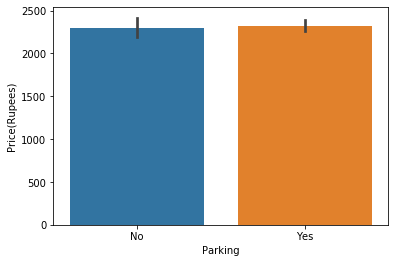

In [45]:
# Price VS Parking 

sns.barplot(x="Parking", y="Price(Rupees)", data =df);

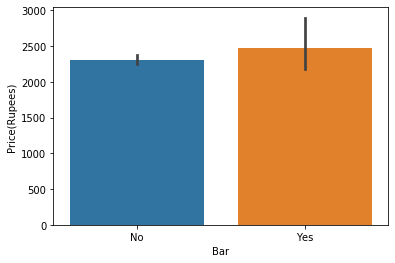

In [46]:
# Price VS Bar

sns.barplot(x="Bar", y="Price(Rupees)", data =df);

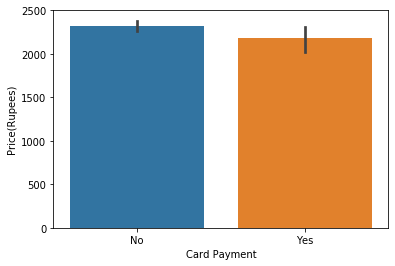

In [47]:
# Price Vs Card Payment

sns.barplot(x='Card Payment', y="Price(Rupees)", data =df);

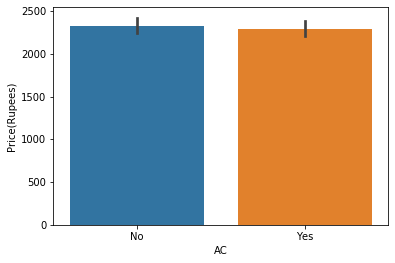

In [48]:
# Price VS AC

sns.barplot(x="AC", y="Price(Rupees)", data =df);

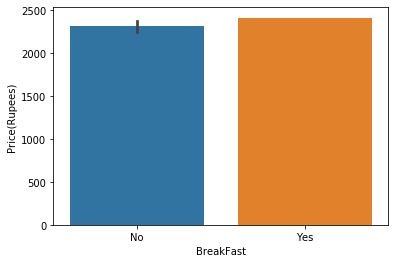

In [44]:
# Price Vs Breakfast

sns.barplot(x="BreakFast", y="Price(Rupees)", data =df);

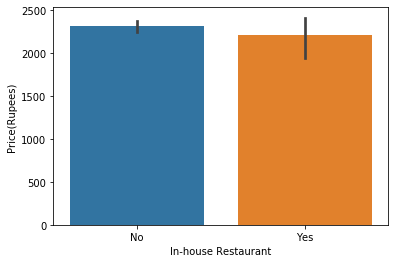

In [49]:
# Price Vs In-house Restauran

sns.barplot(x="In-house Restaurant", y="Price(Rupees)", data =df);

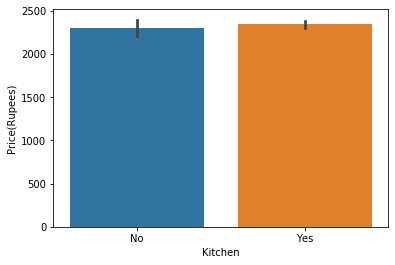

In [50]:
# Price VS Kitchen

sns.barplot(x="Kitchen", y="Price(Rupees)", data =df);

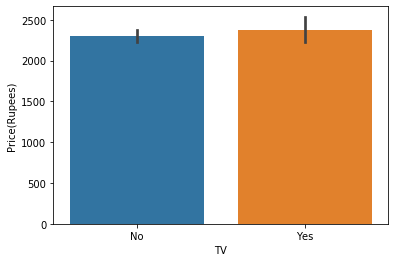

In [51]:
# Price Vs Tv

sns.barplot(x="TV", y="Price(Rupees)", data =df);

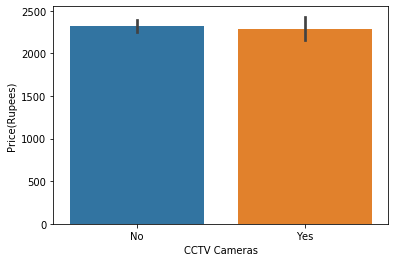

In [52]:
# Price Vs CCTV

sns.barplot(x="CCTV Cameras", y="Price(Rupees)", data =df);

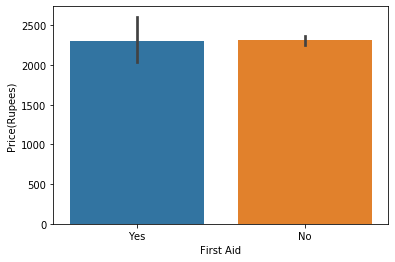

In [53]:
# Price Vs First Aid

sns.barplot(x="First Aid", y="Price(Rupees)", data =df);

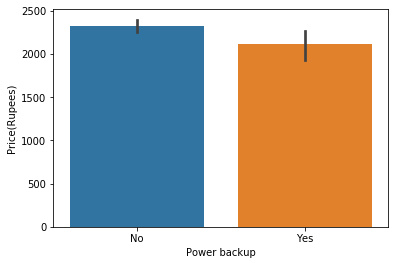

In [54]:
# Price Vs Power Backup

sns.barplot(x="Power backup", y="Price(Rupees)", data =df);

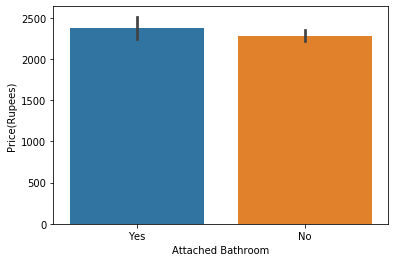

In [55]:
# Price Vs Attached Bathroom

sns.barplot(x="Attached Bathroom", y="Price(Rupees)", data =df);

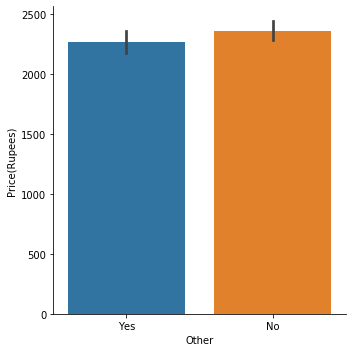

In [40]:
# Price Vs other

sns.catplot(x="Other", y="Price(Rupees)", data =df,kind='bar');

## Rating Vs Location

In [183]:
df.groupby(['Location']).describe()['Rating']

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Anjuna,20.0,4.200,0.332455,3.6,4.000,4.20,4.400,4.8
Arambol,20.0,4.365,0.490193,3.2,4.200,4.45,4.700,5.0
Arpora,20.0,4.235,0.205900,3.9,4.075,4.20,4.400,4.6
Baga Beach,20.0,4.220,0.438418,3.1,4.075,4.25,4.525,4.8
Calangute,20.0,4.110,0.443550,3.1,3.975,4.20,4.400,4.8
Candolim,20.0,4.180,0.341205,3.1,4.175,4.25,4.325,4.6
Colva,20.0,3.850,0.472953,3.1,3.475,3.90,4.125,4.8
Dabolim Airport,20.0,4.235,0.205900,3.9,4.075,4.20,4.400,4.6
Dona Paula,20.0,4.160,0.256289,3.7,4.000,4.15,4.400,4.6


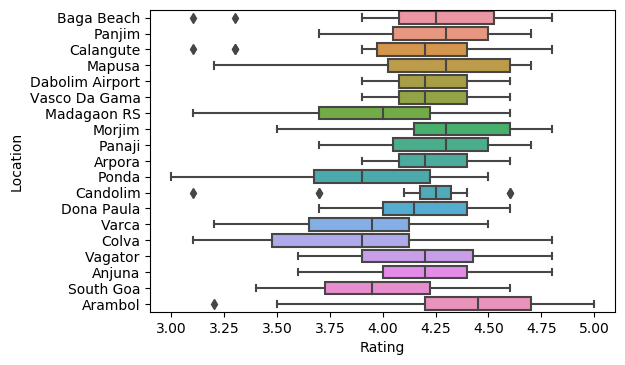

In [184]:
plt.figure(dpi=100)
sns.boxplot(x="Rating", y="Location", data = df);

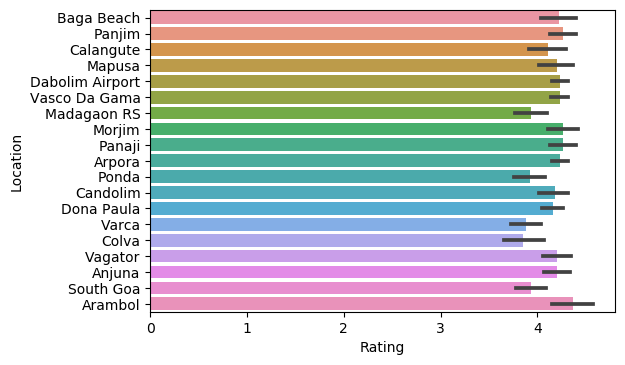

In [185]:
plt.figure(dpi=100)
sns.barplot(x="Rating", y="Location", data =df);

- Highest rating hotels are location in Arambol with 4.365
- Lowest rating hotesl are location in Colva with 3.850

# Rating Vs Amenities

In [57]:
df[(df['Parking']=='Yes')& (df['Bar']=='Yes')]

,Hotel,Rating,Count,Location,Actual Price(Rupees),Discount(% off),Price(Rupees),Amenities,Parking,Card Payment,...,BreakFast,In-house Restaurant,Kitchen,TV,CCTV Cameras,First Aid,Power backup,Bar,Attached Bathroom,Other
70,OYO 71530 Sentosa Villa,4.2,112.0,Mapusa,4022,40,2413,"Parking Facility , First Aid , Bar",Yes,No,...,No,No,No,No,No,Yes,No,Yes,No,No
121,CAPITAL O5563 Hotel Sapphire Deluxe,4.2,112.0,Madagaon RS,4022,40,2413,"Parking Facility , Bar , Attached Bathroom",Yes,No,...,No,No,No,No,No,No,No,Yes,Yes,No
141,Capital O 8058 Map5 Village Resort,4.4,432.0,Morjim,6275,56,2786,"Parking Facility , Kitchen , Bar",Yes,No,...,No,No,Yes,No,No,No,No,Yes,No,No
146,OYO 70630 Sai Coco Resort Morjim,4.2,112.0,Morjim,8295,40,4977,"Parking Facility , Bar , Attached Bathroom",Yes,No,...,No,No,No,No,No,No,No,Yes,Yes,No
205,OYO 19393 Waters Edge,3.9,27.0,Ponda,3335,40,2001,"Parking Facility , Bar , CCTV Cameras",Yes,No,...,No,No,No,No,Yes,No,No,Yes,No,No
211,CAPITAL O5563 Hotel Sapphire Deluxe,4.2,112.0,Ponda,4022,40,2413,"Parking Facility , Bar , Attached Bathroom",Yes,No,...,No,No,No,No,No,No,No,Yes,Yes,No
239,OYO 3273 Eden Garden,3.7,106.0,Candolim,3573,40,2144,"Parking Facility , Bar , Daily Housekeeping",Yes,No,...,No,No,No,No,No,No,No,Yes,No,Yes
356,CAPITAL O5563 Hotel Sapphire Deluxe,4.2,112.0,South Goa,4022,40,2413,"Parking Facility , Bar , Attached Bathroom",Yes,No,...,No,No,No,No,No,No,No,Yes,Yes,No


In [58]:
df[(df['Parking']=='Yes')& (df['Bar']=='Yes')][['Hotel','Rating','Price(Rupees)']]

,Hotel,Rating,Price(Rupees)
70,OYO 71530 Sentosa Villa,4.2,2413
121,CAPITAL O5563 Hotel Sapphire Deluxe,4.2,2413
141,Capital O 8058 Map5 Village Resort,4.4,2786
146,OYO 70630 Sai Coco Resort Morjim,4.2,4977
205,OYO 19393 Waters Edge,3.9,2001
211,CAPITAL O5563 Hotel Sapphire Deluxe,4.2,2413
239,OYO 3273 Eden Garden,3.7,2144
356,CAPITAL O5563 Hotel Sapphire Deluxe,4.2,2413


In [59]:
df[(df['Parking']=='Yes')& (df['Bar']=='Yes')][['Hotel','Rating','Price(Rupees)']].describe()

,Rating,Price(Rupees)
count,8.000000,8.00000
mean,4.125000,2695.00000
std,0.218763,950.12315
min,3.700000,2001.00000
25%,4.125000,2345.75000
50%,4.200000,2413.00000
75%,4.200000,2506.25000
max,4.400000,4977.00000


- Average rating of hotels that provide Parking and Bar is 4.12
- Rating of these hotels range between 3.7-4.4
- We can expand this analysis with all combination of amenities.

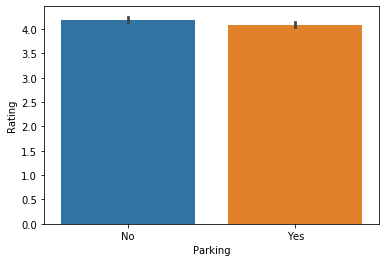

In [61]:
sns.barplot(x="Parking", y="Rating", data =df);

# Bi-Varient analysis

- Hotels in Baga Beach, Calangute, Candolim, Vagator, Anjuna have highest prices.
- Hotels with 4.8 and 4.9 rating are expensive
- Hotels with rating from 3.75 to 4.75 has almost same price(between 2000-2500)
- Highest avg. rated hotels are located in Arambol with 4.365
- Lowest avg. rated hotels are located in Colva with 3.850
- Hotels which provide parking and bar has price range between 2001-4977
- Average price of hotels which provide parking and bar is 2695.
- We can expand this analysis with all combinations of ameinities.
- Average rating of hotels that provide Parking and Bar is 4.12
- Rating of these hotels range between 3.7-4.4
- We can expand this analysis with all combination of amenities.

In [98]:
print('*'*125)

*****************************************************************************************************************************


# Multivarient Analysis

## Price vs Rating vs location

In [89]:
df.groupby(['Location']).describe()[['Price(Rupees)','Rating']]

Price(Rupees)                                                 \
                        count     mean          std     min      25%     50%   
Location                                                                       
Anjuna                   20.0  2464.65   654.641989  1459.0  2382.25  2413.0   
Arambol                  20.0  2187.30   820.864121  1014.0  1667.25  2413.0   
Arpora                   20.0  2341.25   205.171526  1555.0  2413.00  2413.0   
Baga Beach               20.0  2557.10  1057.796712  1360.0  2112.25  2413.0   
Calangute                20.0  2614.20  1019.559327  1927.0  2253.50  2413.0   
Candolim                 20.0  2529.95   859.896045  1442.0  2284.75  2413.0   
Colva                    20.0  2172.25   466.995083  1315.0  1838.50  2413.0   
Dabolim Airport          20.0  2341.25   205.171526  1555.0  2413.00  2413.0   
Dona Paula               20.0  2317.95   173.621329  1931.0  2343.00  2413.0   
Madagaon RS              20.0  2064.95   545.806065   952.0  1548.25  2413.0   
Mapusa                   20.0  2283.70   406.953780   858.0  2413.00  2413.0   
Morjim                   20.0  2423.60  1012.534621  1014.0  2213.00  2413.0   
Panaji                   20.0  2222.00   300.273034  1528.0  1993.50  2413.0   
Panjim                   20.0  2222.00   300.273034  1528.0  1993.50  2413.0   
Ponda                    20.0  2145.65   444.775079  1014.0  1989.50  2413.0   
South Goa                20.0  1906.25   600.218809   952.0  1406.25  1963.0   
Vagator                  20.0  2513.25   903.277126  1279.0  2331.25  2413.0   
Varca                    20.0  2291.45   391.300595  1334.0  2413.00  2413.0   
Vasco Da Gama            20.0  2341.25   205.171526  1555.0  2413.00  2413.0   

                                Rating                                     \
                    75%     max  count   mean       std  min    25%   50%   
Location                                                                    
Anjuna           2413.0  4977.0   20.0  4.200  0.332455  3.6  4.000  4.20   
Arambol          2413.0  4939.0   20.0  4.365  0.490193  3.2  4.200  4.45   
Arpora           2413.0  2413.0   20.0  4.235  0.205900  3.9  4.075  4.20   
Baga Beach       2413.0  6034.0   20.0  4.220  0.438418  3.1  4.075  4.25   
Calangute        2413.0  6034.0   20.0  4.110  0.443550  3.1  3.975  4.20   
Candolim         2413.0  4977.0   20.0  4.180  0.341205  3.1  4.175  4.25   
Colva            2413.0  2936.0   20.0  3.850  0.472953  3.1  3.475  3.90   
Dabolim Airport  2413.0  2413.0   20.0  4.235  0.205900  3.9  4.075  4.20   
Dona Paula       2413.0  2413.0   20.0  4.160  0.256289  3.7  4.000  4.15   
Madagaon RS      2413.0  3055.0   20.0  3.935  0.405586  3.1  3.700  4.00   
Mapusa           2413.0  2413.0   20.0  4.205  0.418613  3.2  4.025  4.30   
Morjim           2419.0  4977.0   20.0  4.265  0.371731  3.5  4.150  4.30   
Panaji           2413.0  2676.0   20.0  4.265  0.323265  3.7  4.050  4.30   
Panjim           2413.0  2676.0   20.0  4.265  0.323265  3.7  4.050  4.30   
Ponda            2413.0  2413.0   20.0  3.920  0.387434  3.0  3.675  3.90   
South Goa        2413.0  3055.0   20.0  3.935  0.367459  3.4  3.725  3.95   
Vagator          2413.0  4977.0   20.0  4.200  0.340279  3.6  3.900  4.20   
Varca            2413.0  2936.0   20.0  3.880  0.381962  3.2  3.650  3.95   
Vasco Da Gama    2413.0  2413.0   20.0  4.235  0.205900  3.9  4.075  4.20   

                             
                   75%  max  
Location                     
Anjuna           4.400  4.8  
Arambol          4.700  5.0  
Arpora           4.400  4.6  
Baga Beach       4.525  4.8  
Calangute        4.400  4.8  
Candolim         4.325  4.6  
Colva            4.125  4.8  
Dabolim Airport  4.400  4.6  
Dona Paula       4.400  4.6  
Madagaon RS      4.225  4.6  
Mapusa           4.600  4.7  
Morjim           4.600  4.8  
Panaji           4.500  4.7  
Panjim           4.500  4.7  
Ponda            4.225  4.5  
South Goa        4.2

- Highest avg hotel price is for the location Candolim 4.1.
- Lowest avg hotel price is for the location South goa 3.9.
- Hight avg rating hotels are located in Arambol(Avg Price= 2187.30) with 4.3
- Lowest avg rating hotels are located in Colva(avg price=2172) with 3.8

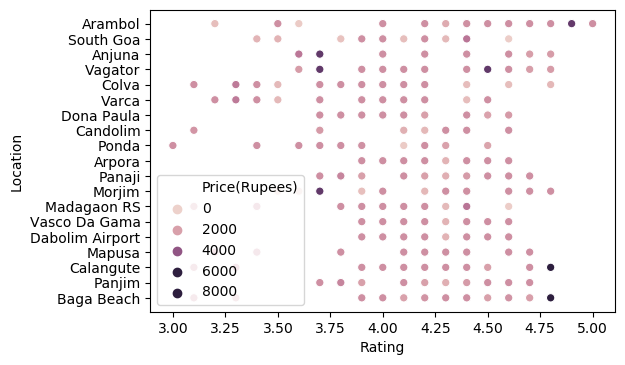

In [38]:
plt.figure(dpi = 100)
sns.scatterplot(x="Rating", y="Location", hue='Price(Rupees)' , data=df);

- Price for more hotels are at the range of 2000-2500 
- Rating for most hotels range between 4-4.75

## Price Vs Rating Vs Parking

In [101]:
df.pivot_table(values=['Price(Rupees)'],index='Rating',columns='Parking',margins=True)

Price(Rupees)                          
Parking            No          Yes          All
Rating                                         
3.0               NaN  2413.000000  2413.000000
3.1       1992.000000  2233.666667  2112.833333
3.2       1312.000000  2413.000000  2046.000000
3.3       2431.500000  2413.000000  2425.333333
3.4       1958.600000  2123.000000  2064.285714
3.5       1345.000000  2413.000000  1558.600000
3.6       1550.000000  2606.666667  2002.857143
3.7       4305.500000  2386.100000  2934.500000
3.8       1670.666667  2314.800000  2073.250000
3.9       1998.400000  2314.421053  2205.448276
4.0       2305.000000  2413.000000  2379.057143
4.1       2202.866667  2113.833333  2163.296296
4.2       2668.950000  2346.044444  2445.400000
4.3       2083.526316  2276.375000  2171.685714
4.4       2348.454545  2428.055556  2384.275000
4.5       2226.000000  2607.400000  2316.809524
4.6       2244.352941  2070.333333  2162.781250
4.7       2323.923077  2413.000000  2330.285714
4.8       4223.500000  1870.333333  3215.000000
4.9               NaN  4939.000000  4939.000000
5.0       2413.000000  1744.000000  2078.500000
All       2301.312849  2322.711443  2312.631579

In [102]:
df.pivot_table(values=['Price(Rupees)'],index='Rating',columns='Parking',margins=True).describe()

Price(Rupees)                          
Parking            No          Yes          All
count       20.000000    22.000000    22.000000
mean      2295.227653  2417.033674  2397.037728
std        764.492867   600.494188   655.300119
min       1312.000000  1744.000000  1558.600000
25%       1983.650000  2244.343750  2087.083333
50%       2235.176471  2366.072222  2259.039927
75%       2364.590909  2413.000000  2405.818750
max       4305.500000  4939.000000  4939.000000

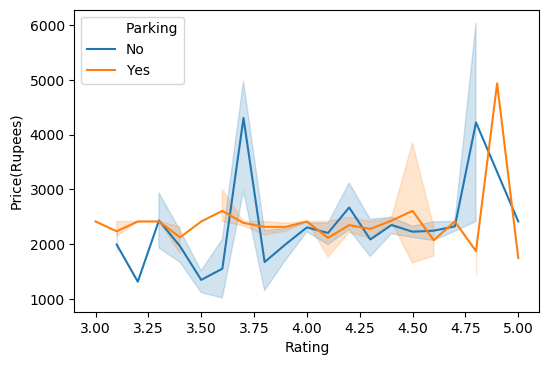

In [108]:
plt.figure(dpi=100)

sns.lineplot(x="Rating", y="Price(Rupees)", hue='Parking', data=df);

- Average price of hotels with parking across locations is 2417 and without parking is 2295.

##  Price vs Location vs Parking

In [109]:
df.pivot_table(values=['Price(Rupees)'],index='Location',columns='Parking',margins=True)

Price(Rupees)                          
Parking                    No          Yes          All
Location                                               
Anjuna            2598.600000  2330.700000  2464.650000
Arambol           1941.555556  2388.363636  2187.300000
Arpora            2248.000000  2391.461538  2341.250000
Baga Beach        2617.625000  2315.000000  2557.100000
Calangute         2850.727273  2325.111111  2614.200000
Candolim          2749.230769  2122.714286  2529.950000
Colva             1955.833333  2265.000000  2172.250000
Dabolim Airport   2248.000000  2391.461538  2341.250000
Dona Paula        2262.625000  2354.833333  2317.950000
Madagaon RS       1818.333333  2170.642857  2064.950000
Mapusa            2228.285714  2413.000000  2283.700000
Morjim            2296.076923  2660.428571  2423.600000
Panaji            2205.071429  2261.500000  2222.000000
Panjim            2205.071429  2261.500000  2222.000000
Ponda             1669.000000  2264.812500  2145.650000
South Goa         1745.125000  2013.666667  1906.250000
Vagator           2493.222222  2529.636364  2513.250000
Varca             1892.666667  2361.823529  2291.450000
Vasco Da Gama     2248.000000  2391.461538  2341.250000
All               2301.312849  2322.711443  2312.631579

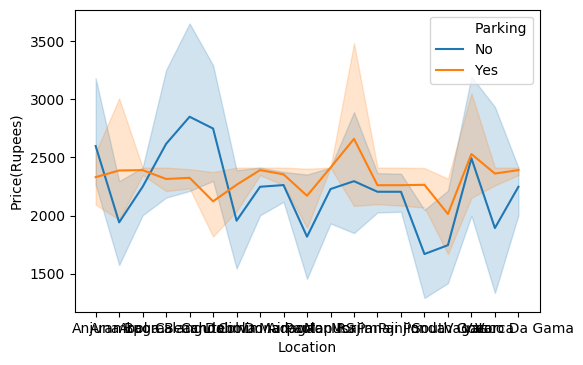

In [36]:
plt.figure(dpi=100)

sns.lineplot(x="Location", y="Price(Rupees)", hue='Parking', data=df);

- Highest avg price for hotels with Parking is 2660, location is Morjim
- Lowest avg price for hotesl with parking is 2013, location is South Goa.
- Highest avg price for hotels without Parking is 2850, location is Calangute
- Lowest avg price for hotesl without parking is 1745, location is South Goa.

# Rating Vs Location Vs Parking

In [142]:
df.pivot_table(values=['Rating'],index='Location',columns='Parking',margins=True)

Rating                 
Parking                No       Yes    All
Location                                  
Anjuna           4.120000  4.280000  4.200
Arambol          4.333333  4.390909  4.365
Arpora           4.300000  4.200000  4.235
Baga Beach       4.281250  3.975000  4.220
Calangute        4.209091  3.988889  4.110
Candolim         4.161538  4.214286  4.180
Colva            3.700000  3.914286  3.850
Dabolim Airport  4.300000  4.200000  4.235
Dona Paula       4.300000  4.066667  4.160
Madagaon RS      3.866667  3.964286  3.935
Mapusa           4.264286  4.066667  4.205
Morjim           4.253846  4.285714  4.265
Panaji           4.378571  4.000000  4.265
Panjim           4.378571  4.000000  4.265
Ponda            3.950000  3.912500  3.920
South Goa        3.850000  3.991667  3.935
Vagator          4.066667  4.309091  4.200
Varca            3.733333  3.905882  3.880
Vasco Da Gama    4.300000  4.200000  4.235
All              4.196648  4.089552  4.140

In [ ]:
- Highest rating hotels with 

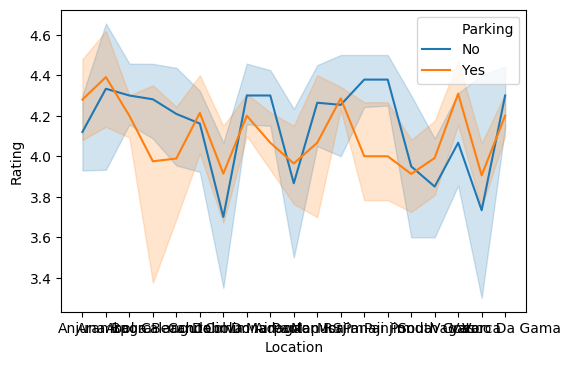

In [143]:
plt.figure(dpi=100)
sns.lineplot(x="Location", y="Rating", hue='Parking', data=df);

- Highest avg rated hotels with Parking are located in Arambol(4.39)
- Lowest avg rated hotels with Parking are located in Varca(3.90)
- Highest avg rated hotels without Parking are located in Panaji(4.37)
- Lowest avg rated hotesl without parking are located in Colva(3.7)

### Multivarient analysis with respect to price

**Price Vs Location Vs Rating**
- Highest avg hotel price is for the location Candolim 4.1.
- Lowest avg hotel price is for the location South goa 3.9.
- Hight avg rating hotels are located in Arambol(Avg Price= 2187.30) with 4.3
- Lowest avg rating hotels are located in Colva(avg price=2172) with 3.8

**Price Vs Rating Vs Parking**

- Average price of hotels with parking across locations is 2417
- Average price of hotels without parking across locations is 2295.

**Price Vs Location Vs Parking**

- Highest avg price for hotels with Parking is 2660, location is Morjim
- Lowest avg price for hotesl with parking is 2013, location is South Goa.
- Highest avg price for hotels without Parking is 2850, location is Calangute
- Lowest avg price for hotesl without parking is 1745, location is South Goa.

**Rating Vs Location Vs Parking**

- Highest avg rated hotels with Parking are located in Arambol(4.39)
- Lowest avg rated hotels with Parking are located in Varca(3.90)
- Highest avg rated hotels without Parking are located in Panaji(4.37)
- Lowest avg rated hotesl without parking are located in Colva(3.7)

In [97]:
print('*'*125)

*****************************************************************************************************************************


# Client Requirement

- Want to know top 10 highest rated(minimum rating count of 50) hotels with their price, location and amenities

In [92]:
df[df['Count']>=50].sort_values(by='Rating',ascending=False).head(10)[['Hotel','Rating','Price(Rupees)','Location','Amenities']]

,Hotel,Rating,Price(Rupees),Location,Amenities
318,OYO 68736 Dhuni Resorts,4.8,2086,Vagator,"Parking Facility , First Aid , Attached Bathr..."
45,Capital O 64180 Adam's Beach Resort,4.8,6034,Calangute,"AC , First Aid , TV"
3,Capital O 64180 Adam's Beach Resort,4.8,6034,Baga Beach,"AC , First Aid , TV"
291,OYO 12855 The Goan Courtyard,4.8,1439,Colva,"Parking Facility , CCTV Cameras , Geyser"
323,OYO 68736 Dhuni Resorts,4.8,2086,Anjuna,"Parking Facility , First Aid , Attached Bathr..."
24,Collection O 22006 Paradise Inn,4.7,2413,Panjim,"CCTV Cameras , Reception , Free Wifi"
302,Capital O 10984 Lagom Comfort,4.7,2032,Vagator,"AC , TV , Card Payment"
16,OYO 3385 Hotel Baga Bay,4.7,2017,Baga Beach,"In-house Restaurant , Kitchen , AC"
31,Collection O 22247 Casa Paradiso,4.7,2413,Panjim,"Power backup , CCTV Cameras"
42,Collection O 39789 Shelsta Holiday Resort,4.7,2413,Calangute,"Buzzer/Door Bell , Attached Bathroom , Daily ..."


In [94]:
df[df['Count']>=50].sort_values(by='Rating',ascending=False).head(10)

,Hotel,Rating,Count,Location,Actual Price(Rupees),Discount(% off),Price(Rupees),Amenities,Parking,Card Payment,...,BreakFast,In-house Restaurant,Kitchen,TV,CCTV Cameras,First Aid,Power backup,Bar,Attached Bathroom,Other
318,OYO 68736 Dhuni Resorts,4.8,134.0,Vagator,3477,40,2086,"Parking Facility , First Aid , Attached Bathr...",Yes,No,...,No,No,No,No,No,Yes,No,No,Yes,No
45,Capital O 64180 Adam's Beach Resort,4.8,271.0,Calangute,10056,40,6034,"AC , First Aid , TV",No,No,...,No,No,No,Yes,No,Yes,No,No,No,No
3,Capital O 64180 Adam's Beach Resort,4.8,271.0,Baga Beach,10056,40,6034,"AC , First Aid , TV",No,No,...,No,No,No,Yes,No,Yes,No,No,No,No
291,OYO 12855 The Goan Courtyard,4.8,92.0,Colva,2398,40,1439,"Parking Facility , CCTV Cameras , Geyser",Yes,No,...,No,No,No,No,Yes,No,No,No,No,Yes
323,OYO 68736 Dhuni Resorts,4.8,134.0,Anjuna,3477,40,2086,"Parking Facility , First Aid , Attached Bathr...",Yes,No,...,No,No,No,No,No,Yes,No,No,Yes,No
24,Collection O 22006 Paradise Inn,4.7,1124.0,Panjim,4022,40,2413,"CCTV Cameras , Reception , Free Wifi",No,No,...,No,No,No,No,Yes,No,No,No,No,Yes
302,Capital O 10984 Lagom Comfort,4.7,788.0,Vagator,3418,41,2032,"AC , TV , Card Payment",No,Yes,...,No,No,No,Yes,No,No,No,No,No,No
16,OYO 3385 Hotel Baga Bay,4.7,287.0,Baga Beach,3361,40,2017,"In-house Restaurant , Kitchen , AC",No,No,...,No,Yes,Yes,No,No,No,No,No,No,Yes
31,Collection O 22247 Casa Paradiso,4.7,1138.0,Panjim,4022,40,2413,"Power backup , CCTV Cameras",No,No,...,No,No,No,No,Yes,No,Yes,No,No,No
42,Collection O 39789 Shelsta Holiday Resort,4.7,1136.0,Calangute,4022,40,2413,"Buzzer/Door Bell , Attached Bathroom , Daily ...",No,No,...,No,No,No,No,No,No,No,No,Yes,Yes


# EOF